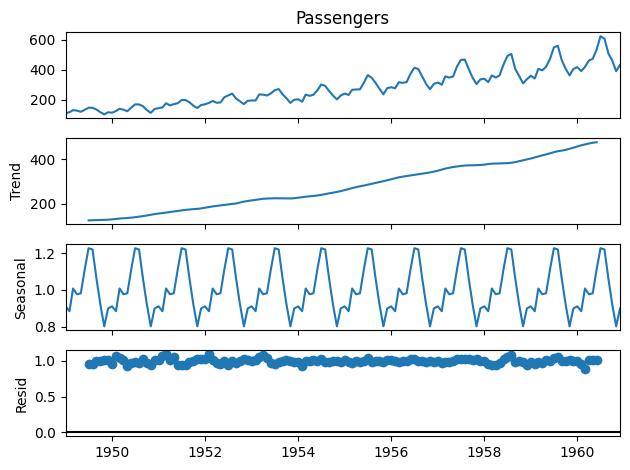

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
airline = pd.read_csv('airline-passengers.csv',
					index_col ='Month',
					parse_dates = True)

# Print the first five rows of the dataset
airline.head()

# ETS Decomposition
result = seasonal_decompose(airline['Passengers'],
							model ='multiplicative')

# ETS plot
result.plot()
plt.show()

In [5]:
# To install the library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.75 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.71 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.89 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.55 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.88 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.28 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.69 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.45 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.98 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 27 Mar 2024   AIC                           1019.178
Time:                                     14:18:56   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Passengers'],
				order = (0, 1, 1),
				seasonal_order =(2, 1, 0, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -446.830
Date:                             Wed, 27 Mar 2024   AIC                            901.659
Time:                                     14:19:54   BIC                            912.776
Sample:                                 01-01-1949   HQIC                           906.173
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2556      0.080     -3.190      0.001      -0.413      -0.099
ar.S.L12      -0.0962      0.090     -1.073      0.283      -0.272       0.080
ar.S.L24       0.1454      0.101      1.445      0.149      -0.052       0.343
sigma2       106.2407     15.243      6.970      0.000      76.364     136.117
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               1.63   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

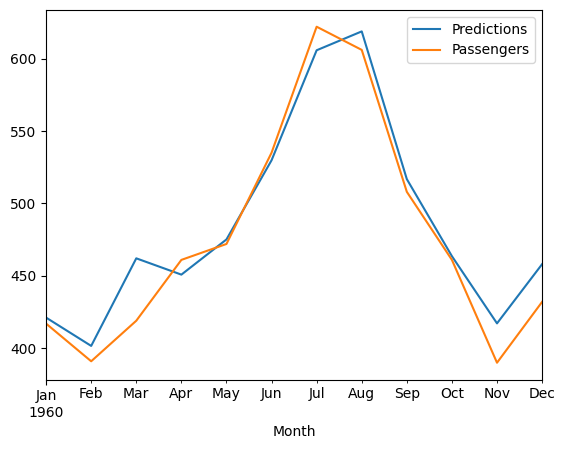

In [9]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)


In [12]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test["Passengers"], predictions))

# Calculate mean squared error
mean_squared_error(test["Passengers"], predictions)


18.380777664782205


337.85298756215633

<Axes: xlabel='Month'>

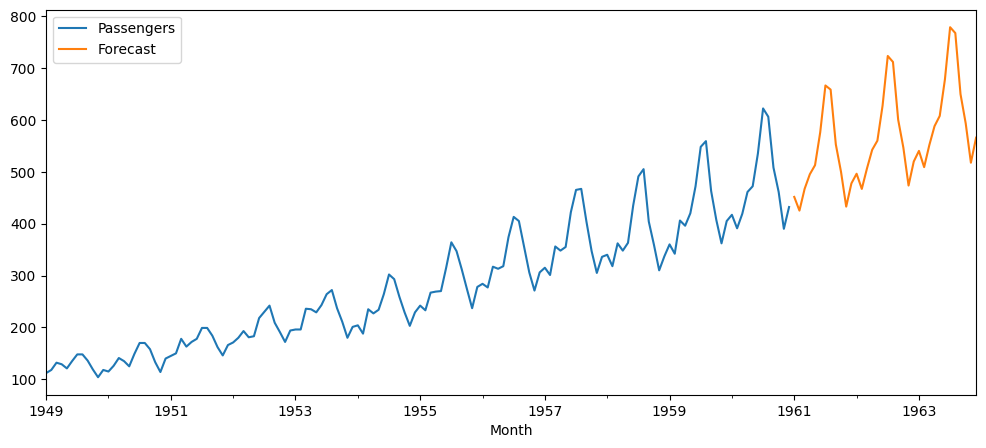

In [15]:
# Train the model on the full dataset
model = model = SARIMAX(airline['Passengers'],
						order = (0, 1, 1),
						seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 3 * 12,
						typ = 'levels').rename('Forecast')

# Plot the forecast values
airline['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
